采样率: 100Hz
信号长度: 100点
频率分辨率: 1.0Hz

前25个频率点及其幅度:
频率 0.0Hz: 幅度 0.0000
频率 1.0Hz: 幅度 0.0024
频率 2.0Hz: 幅度 0.0048
频率 3.0Hz: 幅度 0.0076
频率 4.0Hz: 幅度 0.0109
频率 5.0Hz: 幅度 0.0150
频率 6.0Hz: 幅度 0.0207
频率 7.0Hz: 幅度 0.0294
频率 8.0Hz: 幅度 0.0456
频率 9.0Hz: 幅度 0.0896
频率 10.0Hz: 幅度 0.9838
频率 11.0Hz: 幅度 0.1087
频率 12.0Hz: 幅度 0.0491
频率 13.0Hz: 幅度 0.0292
频率 14.0Hz: 幅度 0.0181
频率 15.0Hz: 幅度 0.0098
频率 16.0Hz: 幅度 0.0019
频率 17.0Hz: 幅度 0.0076
频率 18.0Hz: 幅度 0.0230
频率 19.0Hz: 幅度 0.0601
频率 20.0Hz: 幅度 0.4500
频率 21.0Hz: 幅度 0.1344
频率 22.0Hz: 幅度 0.0678
频率 23.0Hz: 幅度 0.0483
频率 24.0Hz: 幅度 0.0389


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

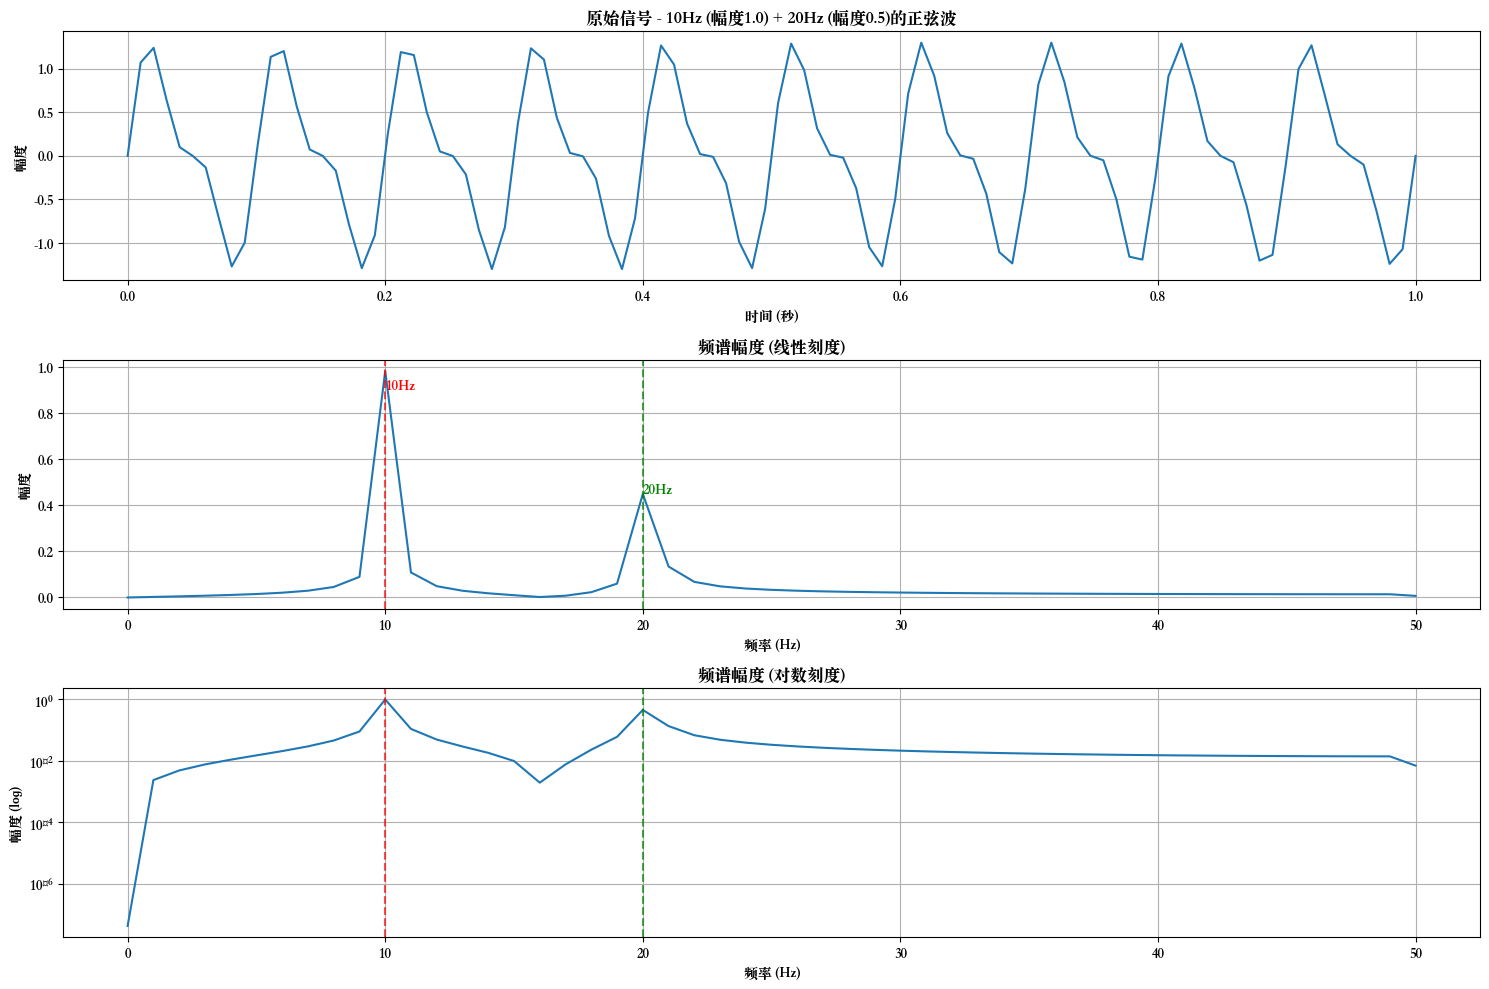

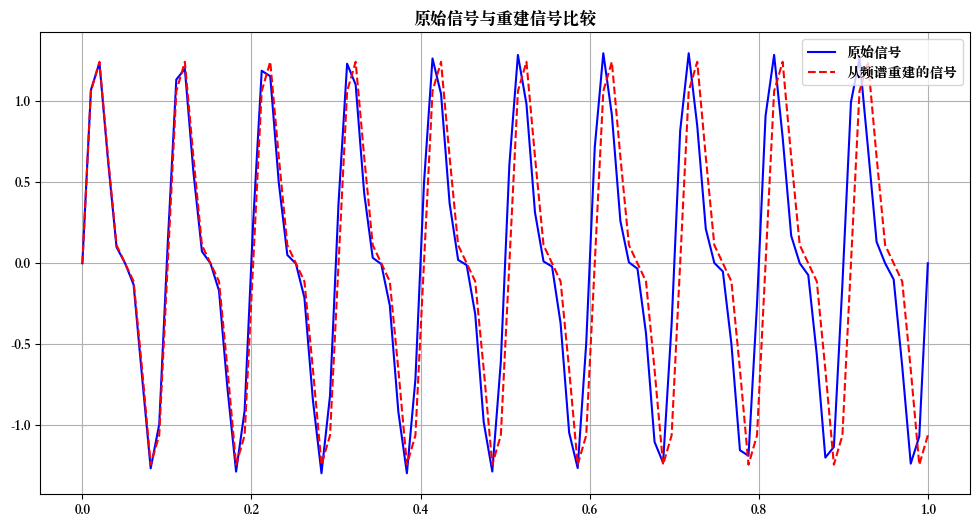


重建误差(最大绝对差): 1.0633112192


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# 设置全局字体为系统中的中文字体
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'  # macOS 中的字体路径
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置参数
sample_rate = 100  # 采样率100Hz
duration = 1.0     # 1秒信号
N = int(sample_rate * duration)  # 样本点数
t = torch.linspace(0, duration, N)  # 时间点

# 创建信号：10Hz和20Hz的正弦波
freq1, freq2 = 10, 20
amplitude1, amplitude2 = 1.0, 0.5
signal = amplitude1 * torch.sin(2 * np.pi * freq1 * t) + amplitude2 * torch.sin(2 * np.pi * freq2 * t)

# 计算FFT
signal_rfft = torch.fft.rfft(signal)

# 获取幅度谱 - 这里乘以2是因为能量在正负频率上分布
# 对于rfft，我们只看到正频率部分
magnitude_spectrum = torch.abs(signal_rfft) * 2 / N  # 归一化
# 对于第0个和第N/2个频率分量不需要乘以2
if N % 2 == 0:  # 如果N是偶数
    magnitude_spectrum[0] /= 2
    magnitude_spectrum[-1] /= 2

# 获取频率轴
frequencies = torch.fft.rfftfreq(N, 1.0/sample_rate)

# 详细打印结果
print(f"采样率: {sample_rate}Hz")
print(f"信号长度: {N}点")
print(f"频率分辨率: {sample_rate/N}Hz")
print("\n前25个频率点及其幅度:")
for i in range(min(25, len(frequencies))):
    print(f"频率 {frequencies[i]:.1f}Hz: 幅度 {magnitude_spectrum[i]:.4f}")

# 可视化结果    
plt.figure(figsize=(15, 10))

# 原始信号
plt.subplot(3, 1, 1)
plt.plot(t.numpy(), signal.numpy())
plt.title('原始信号 - 10Hz (幅度1.0) + 20Hz (幅度0.5)的正弦波')
plt.xlabel('时间 (秒)')
plt.ylabel('幅度')
plt.grid(True)

# 频谱幅度 - 线性刻度
plt.subplot(3, 1, 2)
plt.plot(frequencies.numpy(), magnitude_spectrum.numpy())
plt.title('频谱幅度 (线性刻度)')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
# 标注10Hz和20Hz的峰值
plt.axvline(x=10, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=20, color='g', linestyle='--', alpha=0.7)
plt.text(10, 0.9, '10Hz', color='r')
plt.text(20, 0.45, '20Hz', color='g')

# 频谱幅度 - 对数刻度，便于观察小幅值
plt.subplot(3, 1, 3)
plt.semilogy(frequencies.numpy(), magnitude_spectrum.numpy())
plt.title('频谱幅度 (对数刻度)')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度 (log)')
plt.grid(True)
plt.axvline(x=10, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=20, color='g', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 理论验证 - 重建信号
# 创建理想频谱
ideal_spectrum = torch.zeros_like(signal_rfft)
ideal_spectrum[10] = amplitude1 * N / 2 * np.exp(-0.5j * np.pi)  # 10Hz, 相位为-π/2
ideal_spectrum[20] = amplitude2 * N / 2 * np.exp(-0.5j * np.pi)  # 20Hz, 相位为-π/2

# 逆变换重建
reconstructed = torch.fft.irfft(ideal_spectrum, n=N)

# 比较原始信号和重建信号
plt.figure(figsize=(12, 6))
plt.plot(t.numpy(), signal.numpy(), 'b-', label='原始信号')
plt.plot(t.numpy(), reconstructed.numpy(), 'r--', label='从频谱重建的信号')
plt.title('原始信号与重建信号比较')
plt.legend()
plt.grid(True)
plt.show()

# 计算重建误差
error = torch.max(torch.abs(signal - reconstructed))
print(f"\n重建误差(最大绝对差): {error:.10f}")

In [2]:
from scipy.fft import fft
fft([4,3,2,1])

array([10.-0.j,  2.-2.j,  2.-0.j,  2.+2.j])

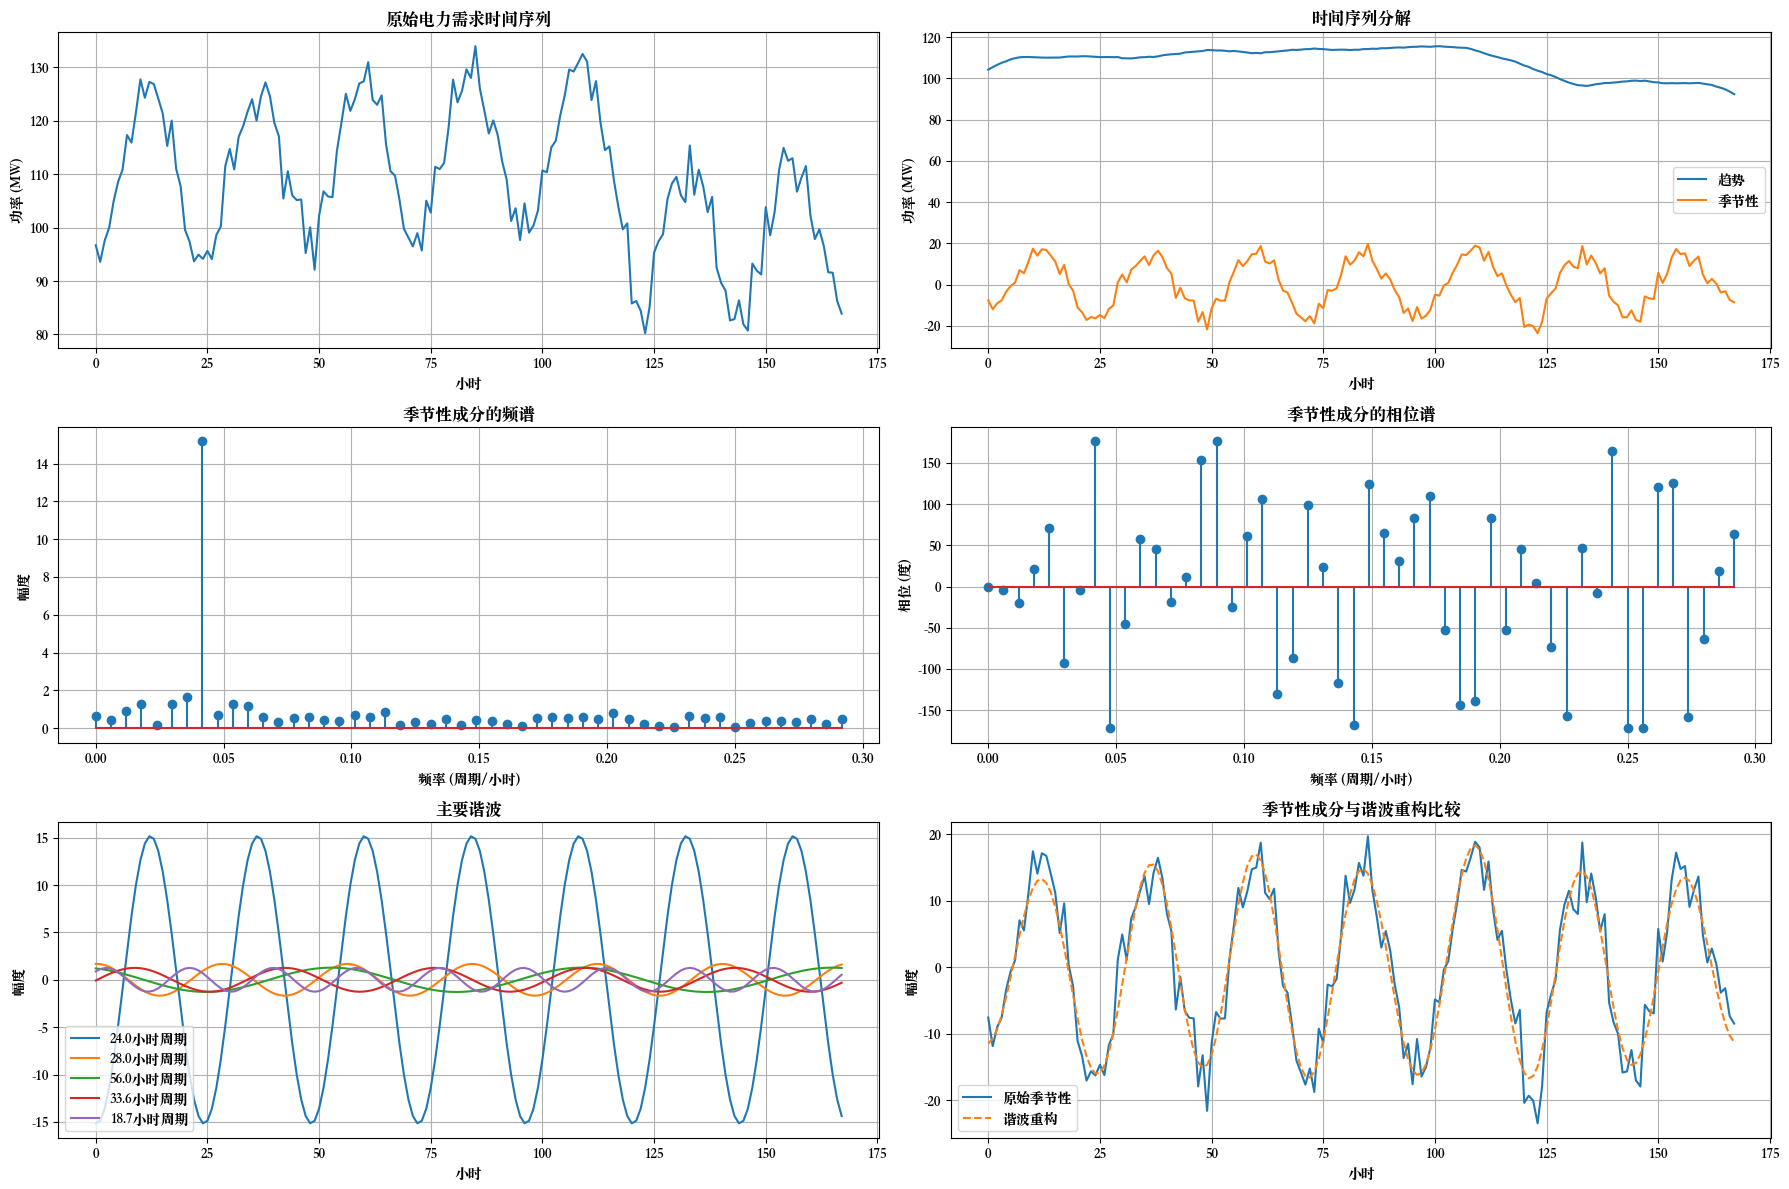

主要谐波:
- 周期: 24.0小时, 幅度: 15.18, 相位: 176.3°
- 周期: 28.0小时, 幅度: 1.68, 相位: -3.8°
- 周期: 56.0小时, 幅度: 1.28, 相位: 20.7°
- 周期: 33.6小时, 幅度: 1.26, 相位: -93.4°
- 周期: 18.7小时, 幅度: 1.26, 相位: -45.3°


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import torch
import torch.nn.functional as F

# 创建一个模拟的一周电力需求数据 (每小时一个点，共7*24=168个点)
hours = np.arange(168)
# 创建长期趋势
trend = 100 + 0.05 * hours
# 创建日内变化 (24小时周期)
daily = 15 * np.sin(2*np.pi*hours/24 - np.pi/2)
# 创建工作日vs周末变化 (一周周期)
weekly = np.zeros_like(hours)
for i in range(7):
    if i < 5:  # 工作日
        weekly[i*24:(i+1)*24] = 10
    else:      # 周末
        weekly[i*24:(i+1)*24] = -10
# 添加一些噪声
noise = 3 * np.random.randn(168)
# 合成最终时间序列
power_demand = trend + daily + weekly + noise

# 模拟Autoformer的时间序列分解函数
def series_decomp(data, kernel_size=25):
    # 使用卷积实现移动平均
    weights = torch.ones(kernel_size) / kernel_size
    weights = weights.view(1, 1, -1).to(torch.float32)
    data_pad = F.pad(torch.from_numpy(data).float().view(1, 1, -1), 
                    (kernel_size//2, kernel_size//2), mode='replicate')
    trend = F.conv1d(data_pad, weights).view(-1).numpy()
    seasonal = data - trend
    return seasonal, trend

# 使用FFT分析季节性成分中的谐波
def analyze_harmonics(seasonal, sampling_rate=1):
    # 执行FFT
    fft_result = np.fft.rfft(seasonal)
    # 计算频率
    freqs = np.fft.rfftfreq(len(seasonal), d=1/sampling_rate)
    # 计算幅度
    magnitudes = np.abs(fft_result) * 2 / len(seasonal)
    # 计算相位 (转换为度)
    phases = np.angle(fft_result) * 180 / np.pi
    return freqs, magnitudes, phases

# 分解时间序列
seasonal, trend = series_decomp(power_demand)

# 分析谐波
freqs, magnitudes, phases = analyze_harmonics(seasonal)

# 找出主要谐波 (幅度最大的几个)
n_harmonics = 5
top_indices = np.argsort(magnitudes)[-n_harmonics:][::-1]
main_freqs = freqs[top_indices]
main_periods = 1/main_freqs[main_freqs > 0]  # 避免除以零
main_magnitudes = magnitudes[top_indices]
main_phases = phases[top_indices]

# 重构信号，仅使用主要谐波
reconstructed_seasonal = np.zeros_like(seasonal)
t = np.arange(len(seasonal))
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:  # 跳过直流分量
        reconstructed_seasonal += main_magnitudes[i] * np.cos(2*np.pi*freqs[idx]*t + np.radians(main_phases[i]))

# 可视化
plt.figure(figsize=(18, 12))

# 原始时间序列
plt.subplot(3, 2, 1)
plt.plot(hours, power_demand)
plt.title('原始电力需求时间序列')
plt.xlabel('小时')
plt.ylabel('功率 (MW)')
plt.grid(True)

# 趋势和季节性分解
plt.subplot(3, 2, 2)
plt.plot(hours, trend, label='趋势')
plt.plot(hours, seasonal, label='季节性')
plt.title('时间序列分解')
plt.xlabel('小时')
plt.ylabel('功率 (MW)')
plt.legend()
plt.grid(True)

# 频谱分析
plt.subplot(3, 2, 3)
plt.stem(freqs[:50], magnitudes[:50])  # 只显示前50个频率
plt.title('季节性成分的频谱')
plt.xlabel('频率 (周期/小时)')
plt.ylabel('幅度')
plt.grid(True)

# 相位分析
plt.subplot(3, 2, 4)
plt.stem(freqs[:50], phases[:50])
plt.title('季节性成分的相位谱')
plt.xlabel('频率 (周期/小时)')
plt.ylabel('相位 (度)')
plt.grid(True)

# 主要谐波
plt.subplot(3, 2, 5)
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:  # 跳过直流分量
        period = 1/freqs[idx]
        plt.plot(hours, main_magnitudes[i] * np.cos(2*np.pi*freqs[idx]*t + np.radians(main_phases[i])),
                 label=f'{period:.1f}小时周期')
plt.title('主要谐波')
plt.xlabel('小时')
plt.ylabel('幅度')
plt.legend()
plt.grid(True)

# 原始季节性与重构比较
plt.subplot(3, 2, 6)
plt.plot(hours, seasonal, label='原始季节性')
plt.plot(hours, reconstructed_seasonal, label='谐波重构', linestyle='--')
plt.title('季节性成分与谐波重构比较')
plt.xlabel('小时')
plt.ylabel('幅度')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印主要谐波信息
print("主要谐波:")
for i, idx in enumerate(top_indices):
    if freqs[idx] > 0:
        print(f"- 周期: {1/freqs[idx]:.1f}小时, 幅度: {main_magnitudes[i]:.2f}, 相位: {main_phases[i]:.1f}°")